### Movie Industry Data Analysis Project

In this project we will explore correlations in the data set. Specifically we are making a hypothesis regarding the budget and the gross earnings. Specifically, we are hypothesizing that budget and gross earnings are strongly correlated, meaning when budget is high so are earnings and when budget is low so are earnings.

In [8]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'../resources/movies.csv')

The dataset was explored in Excel to get an idea of the type of data we're working with and to spot any immediate errors in the dataset. Through this exploration process we did indeed find a few errors which will need to be cleaned up in the next section. Some errors include:

* The year column does not match the year from the released column for some rows. 
* The country column does not match the country from the released column.

### Data Cleaning Section

In this section we will clean up some of the inconsistancies in the data. First we will look for any missing values.

In [9]:
# Find any missing values in the data frame
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

This shows us that there are quite a significant number of missing values, particularly in the budget column. Since budget, gross and votes are crucial to our analysis, we need to remove the rows with empty data. We can still perform an analysis on the remaining data. 

In [10]:
# Drop rows with missing values
df = df.dropna(axis=0, subset=['budget', 'gross', 'votes'])

# Now we can check what remaining values are missing
df.isna().sum()

name         0
rating      12
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      1
budget       0
gross        0
company      2
runtime      1
dtype: int64

As we can see, dropping the rows that we did resulted in significantly less missing data. Next we will tackle the incorrect year in the year column that we noticed during our data explortation phase in Excel. Note that rating, company and runtime are not pertinent to the analysis of the data and therefore will not fixed. However, country is as easy to fix as year is so we will tackle both.

In [11]:
# We can simply replace the current values in the columns with the correct values from the released column
df = df.sort_values(by=['gross'], inplace=False, ascending=True)
df['year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df['country'] = df['released'].str.extract('.*\((.*)\).*').astype(str)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,Brazil,15000000.0,309.0,Daybreak,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,596.0,DENTSU Music And Entertainment,134.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2270.0,Embassy Pictures,85.0
3681,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2554.0,Copperheart Entertainment,108.0
2434,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,South Korea,5000000.0,2970.0,Trimark Pictures,97.0


Next, we will take a look at what datatypes our dataset currently is using for our variables.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 3203 to 5445
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int32  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5436 non-null   object 
 11  budget    5436 non-null   float64
 12  gross     5436 non-null   float64
 13  company   5434 non-null   object 
 14  runtime   5435 non-null   float64
dtypes: float64(5), int32(1), object(9)
memory usage: 658.3+ KB


We can see that votes, budget and gross are stored as floats but the decimal data is irrelevant, therefore we will convert this data to integers.

In [13]:
# Change budget and gross to int64 to avoid data loss
df = df.astype({"budget":'int64', "gross":'int64', "votes":'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 3203 to 5445
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int32  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   int64  
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5436 non-null   object 
 11  budget    5436 non-null   int64  
 12  gross     5436 non-null   int64  
 13  company   5434 non-null   object 
 14  runtime   5435 non-null   float64
dtypes: float64(2), int32(1), int64(3), object(9)
memory usage: 658.3+ KB


### Analysis of data

Here we will do some basic analysis like checking the correlation between revenue to budget and revenue to company that made the movie.

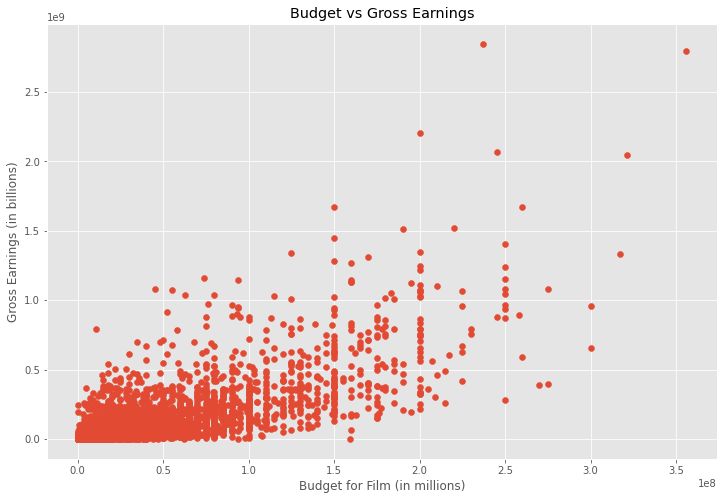

In [14]:
# Budget vs Gross (scatter plot)

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film (in millions)')
plt.ylabel('Gross Earnings (in billions)')
plt.show()

With this data it's still not entirely clear if they're tightly correlated, but they do appear to be. In order to get a more accurate result we can use regression to plot the same data of budget vs gross.

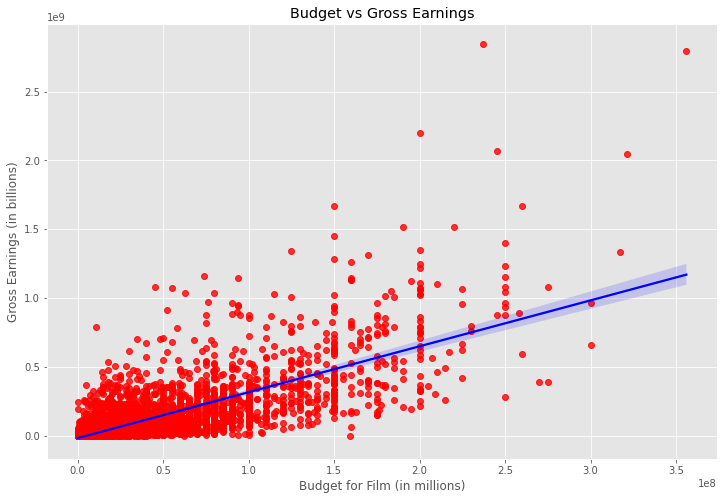

In [15]:
# Budget vs Gross (regression)

reg_plot = sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}).set(title='Budget vs Gross Earnings', xlabel="Budget for Film (in millions)", ylabel="Gross Earnings (in billions)")
# reg_plot.set_xlabel("Budget for Film (in millions)")

It may also be a good idea to calculate the correlation coefficient since visuals can be misleading. Since a correlation coefficient that is greater than or equal to 0.7 means there is a strong correlation then we hope to find a correlation coefficient between budget and gross earnings to be 0.7 or higher. 

In [16]:
cor_matrix = df.corr(method='pearson')
cor_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.061029,0.202883,0.320245,0.268626,0.074432
score,0.061029,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.202883,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.320245,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.268626,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074432,0.414580,0.352437,0.318595,0.275596,1.000000


And of course by looking at the correlation matrix we do see that the correlation coeffcient between budget and gross is indeed higher than 0.7 which means that these two variables are strongly correlated. We can visualize this correlation with a heat map.  

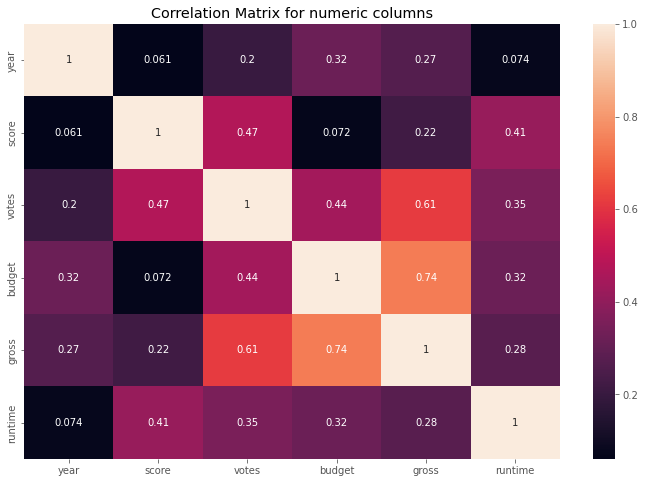

In [17]:
sns.heatmap(cor_matrix, annot=True)
plt.title('Correlation Matrix for numeric columns')
plt.show()

We can see from the heat map that budget and gross are the darkest squares in the heat map which indicates a strong correlation. This just further proves our hypothesis that their is a strong correlation between these two variables.